In [1]:
import os
from PIL.Image import open
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LassoCV, Lasso
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# 1.

Practice and discuss the results of Logistic Regression (LR), 𝑘-Nearest Neighbors (𝑘NN), and Support Vector Machine (SVM) on the ORL face dataset.


In [2]:
try:
    path_ = os.getcwd()+'/ORL Faces'
except:
    print('Set path_ to your ORL Faces fold directory')

df = pd.DataFrame()

for people in range(1, 41):
    for order in range(1, 11):
        im = open(path_+'/'+str(people)+'_'+str(order)+'.png')
        ar = pd.DataFrame(np.mat(np.asarray(im).flatten()), columns=[
                          r for r in range(1, 2577)], index=[(people-1)*10+order-1])
        df = pd.concat([df, ar], axis=0)
# add target columns
gender = [0]*10 + [1]*10 + [1]*10 + [1]*10 + [1]*10 + [1]*10 + [1]*10 + [0]*10 + [1]*10 + [0]*10 + \
    [1]*10 + [1]*10 + [1]*10 + [1]*10 + [1]*10 + [1]*10 + [1]*10 + [1]*10 + [1]*10+[1]*10 + [1]*10 + \
    [1]*10 + [1]*10 + [1]*10 + [1]*10 + [1]*10 + [1]*10 + [1]*10 + [1]*10 + [1] * 10 + \
    [1]*10 + [0]*10 + [1]*10 + [1]*10 + [1] * 10 + \
    [1]*10 + [1]*10 + [1]*10 + [1]*10 + [1]*10
df['gender'] = gender
df

,1,2,3,4,5,6,7,8,9,10,...,2568,2569,2570,2571,2572,2573,2574,2575,2576,gender
0,88,88,90,91,91,92,90,93,99,109,...,176,166,149,142,145,141,138,142,134,0
1,87,90,95,96,92,90,97,107,111,112,...,175,172,147,131,132,124,124,120,88,0
2,92,92,88,98,104,109,108,100,80,63,...,84,128,154,161,169,170,165,146,151,0
3,92,96,93,94,99,105,108,109,121,152,...,153,164,163,165,166,161,157,79,54,0
4,83,75,88,91,101,90,86,80,63,58,...,145,148,151,139,134,173,167,176,188,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,124,124,125,123,124,125,123,124,123,122,...,34,63,37,37,37,38,39,38,40,1
396,128,128,128,128,129,128,129,127,127,127,...,92,90,90,91,91,91,91,92,93,1
397,122,123,124,124,123,123,122,126,130,126,...,24,57,41,37,36,37,38,40,38,1
398,120,119,121,119,120,121,122,117,111,100,...,137,134,101,26,77,95,95,92,90,1


In [3]:
X = df.drop(['gender'], axis=1)
y = df['gender']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, random_state=322)

# logistic regression
LR = LogisticRegression(max_iter=1000, random_state=322).fit(X_train, y_train)
y_pred_LR = LR.predict(X_test)

print(LR.__class__.__name__, '\n', classification_report(y_test, y_pred_LR))

# KNN
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print('\n', knn.__class__.__name__, '\n',
      classification_report(y_test, y_pred_knn))

# SVM
svm = SVC(kernel='linear', random_state=322).fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print('\n', svm.__class__.__name__, '\n',
      classification_report(y_test, y_pred_svm))

LogisticRegression 
               precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.98      1.00      0.99       106

    accuracy                           0.98       120
   macro avg       0.99      0.93      0.96       120
weighted avg       0.98      0.98      0.98       120


 KNeighborsClassifier 
               precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.98      1.00      0.99       106

    accuracy                           0.98       120
   macro avg       0.99      0.93      0.96       120
weighted avg       0.98      0.98      0.98       120


 SVC 
               precision    recall  f1-score   support

           0       1.00      0.79      0.88        14
           1       0.97      1.00      0.99       106

    accuracy                           0.97       120
   macro avg       0.99      0.89      0.93       120
weighted avg       0

In [4]:
def plot_roc(model, y_test, y_pred):
    [fpr, tpr, thr] = roc_curve(y_test, y_pred)
    plt.figure()
    plt.plot(fpr, tpr, color='coral',
             label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1 - specificity)')
    plt.ylabel('True Positive Rate (recall)')
    plt.title(model.__class__.__name__ +
              ' Receiver operating characteristic (ROC) curve')
    plt.legend(loc="lower right")
    plt.show()

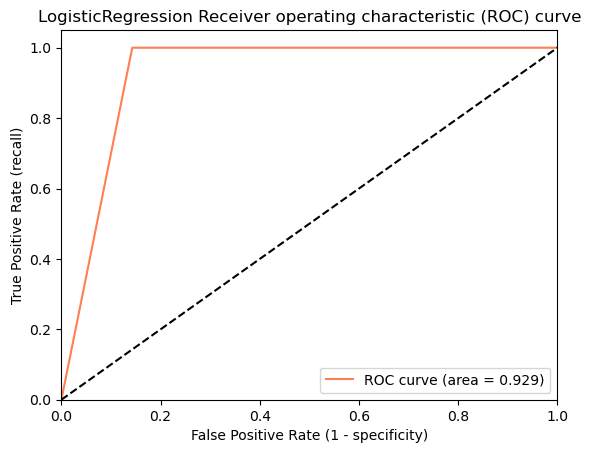

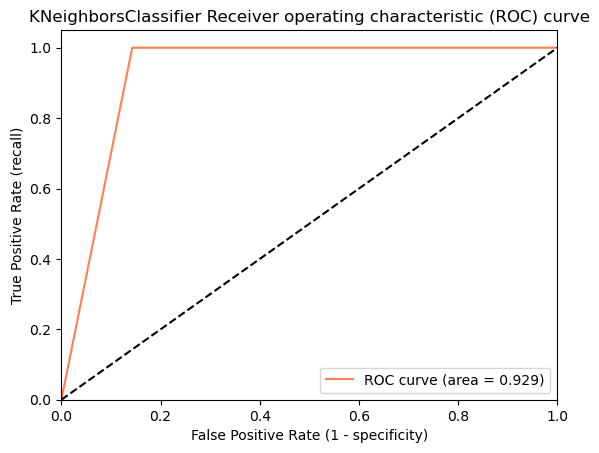

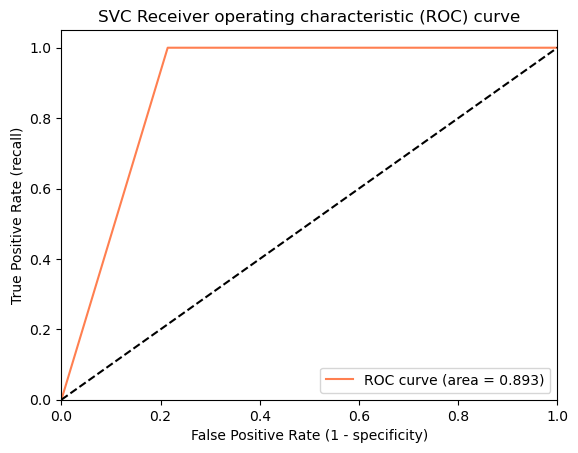

(None, None, None)

In [5]:
plot_roc(LR, y_test=y_test, y_pred=y_pred_LR), plot_roc(
    knn, y_test, y_pred_knn), plot_roc(svm, y_test, y_pred_svm)

使用 Logistic regression, KNN 以及 SVM model 得出的結果如上所示，可以發現這三個模型在**行數>>列述**時，其預測效果還是不錯，AUC 分別為 0.929, 0.929, 0.893，可以從中發現雖然三者效果都不錯，但 SVM 使用在存在**行數>>列述**問題之 dataset 會略差於其餘兩者


# 2.

Considering the parsimonious principle in modeling, set up LR, 𝑘NN, and SVM models using as few variables (pixels) to get as close as possible to the results in EX1.


features' new dimension: 68


Text(0.5, 1.0, 'Principle component analysis')

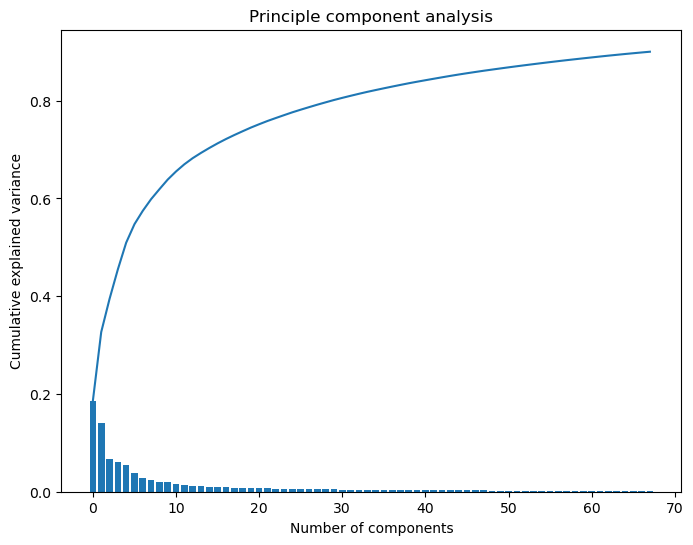

In [6]:
pca = PCA(0.9).fit(X_train)

X_train_new = pca.transform(X_train)
X_test_new = pca.transform(X_test)

print('features\' new dimension: {}'.format(X_train_new.shape[1]))

plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.bar(range(len(pca.explained_variance_ratio_)),
        pca.explained_variance_ratio_)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Principle component analysis')

In [7]:
# logistic regression
LR = LogisticRegression(max_iter=1000, random_state=322).fit(
    X_train_new, y_train)
y_pred_LR = LR.predict(X_test_new)
print(LR.__class__.__name__, '\n', classification_report(y_test, y_pred_LR))

# KNN
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train_new, y_train)
y_pred_knn = knn.predict(X_test_new)
print('\n', knn.__class__.__name__, '\n',
      classification_report(y_test, y_pred_knn))

# SVM
svm = SVC(kernel='linear').fit(X_train_new, y_train)
y_pred_svm = svm.predict(X_test_new)
print('\n', svm.__class__.__name__, '\n',
      classification_report(y_test, y_pred_svm))


LogisticRegression 
               precision    recall  f1-score   support

           0       1.00      0.79      0.88        14
           1       0.97      1.00      0.99       106

    accuracy                           0.97       120
   macro avg       0.99      0.89      0.93       120
weighted avg       0.98      0.97      0.97       120


 KNeighborsClassifier 
               precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.98      1.00      0.99       106

    accuracy                           0.98       120
   macro avg       0.99      0.93      0.96       120
weighted avg       0.98      0.98      0.98       120


 SVC 
               precision    recall  f1-score   support

           0       1.00      0.71      0.83        14
           1       0.96      1.00      0.98       106

    accuracy                           0.97       120
   macro avg       0.98      0.86      0.91       120
weighted avg       0

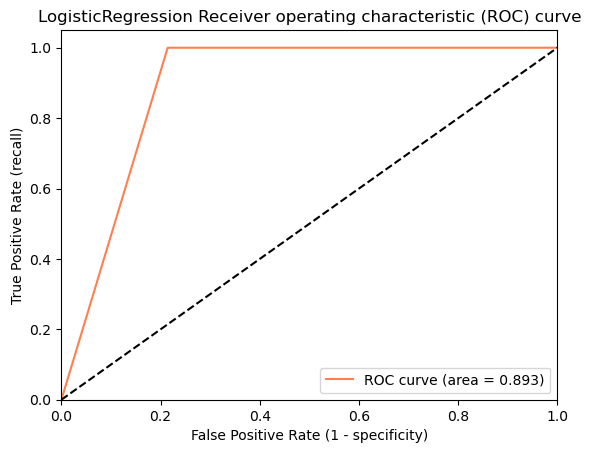

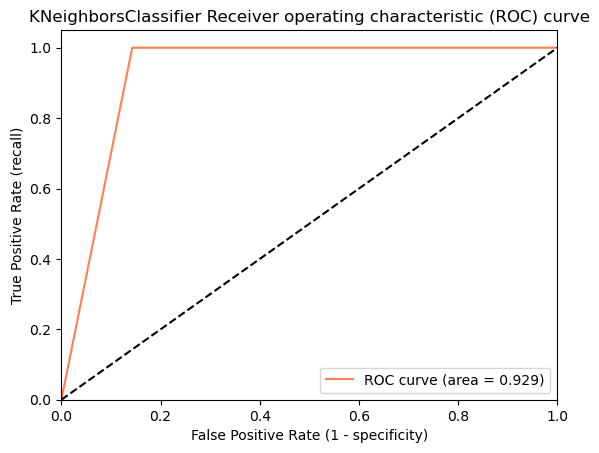

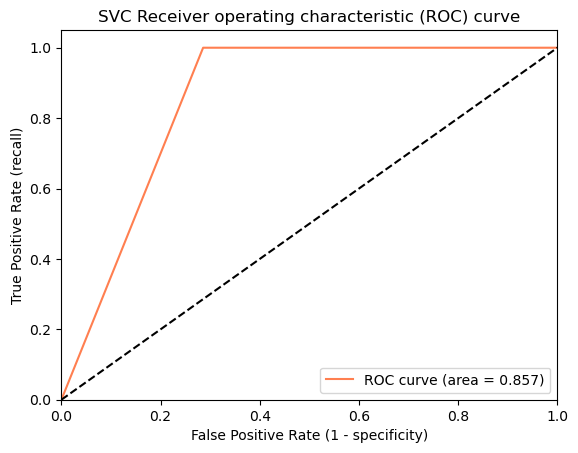

(None, None, None)

In [8]:
plot_roc(LR, y_test=y_test, y_pred=y_pred_LR), plot_roc(
    knn, y_test, y_pred_knn), plot_roc(svm, y_test, y_pred_svm)

經過特徵挑選後，新的特徵共有 68 個，使用這些特徵來建立 logistic regression, KNN, SVM model 得出之結果如上，可以發現在減少特徵數之後，除了 KNN，其他兩者有預測力下降的傾向，不過仍算是預測力效果優良的 model。


# 3.

Look for the multiclass classifiers in Logistic Regression, 𝑘-Nearest Neighbors and Support Vector Machine. Apply them to analyze AutoMPG and discuss the results. The target is to classify the “origin” of the car and “mpg” can be included in the X.


In [9]:
cols = ['mpg', 'cylinders', 'displacement', 'horsepower',
        'weight', 'acceleration', 'model year', 'origin', 'car name']
df_2 = pd.read_csv('auto-mpg.data.txt', sep='\s+', header=None, names=cols)
df_2 = df_2[df_2['horsepower'] != '?']
df_2

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


Text(0.5, 1.0, 'Origin countplot')

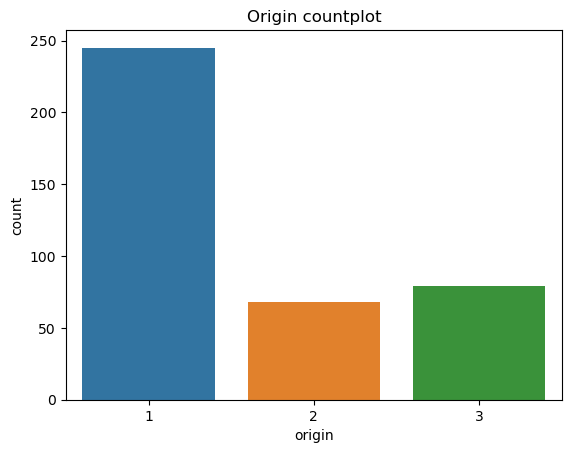

In [10]:
df_2['origin'].unique()
sns.countplot(x='origin', data=df_2)
plt.title('Origin countplot')

In [11]:
X = df_2[['mpg', 'cylinders', 'displacement',
          'horsepower', 'weight', 'acceleration', 'model year']]
y = df_2['origin']

# Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=322)

# Logistic Regression
lr_model = LogisticRegression(
    multi_class='multinomial', solver='lbfgs', max_iter=10000).fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
print(lr_model.__class__.__name__, '\n',
      classification_report(y_test, lr_pred))


# k-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
print(knn_model.__class__.__name__, '\n',
      classification_report(y_test, knn_pred))

# Support Vector Machine
svm_model = SVC(kernel='linear', decision_function_shape='ovr').fit(
    X_train, y_train)
svm_pred = svm_model.predict(X_test)
print(svm_model.__class__.__name__, '\n',
      classification_report(y_test, svm_pred))

LogisticRegression 
               precision    recall  f1-score   support

           1       0.95      0.88      0.91        84
           2       0.57      0.50      0.53        16
           3       0.50      0.72      0.59        18

    accuracy                           0.81       118
   macro avg       0.67      0.70      0.68       118
weighted avg       0.83      0.81      0.81       118

KNeighborsClassifier 
               precision    recall  f1-score   support

           1       0.88      0.88      0.88        84
           2       0.60      0.56      0.58        16
           3       0.47      0.50      0.49        18

    accuracy                           0.78       118
   macro avg       0.65      0.65      0.65       118
weighted avg       0.78      0.78      0.78       118

SVC 
               precision    recall  f1-score   support

           1       0.95      0.83      0.89        84
           2       0.50      0.44      0.47        16
           3       0.47  

當資料不平衡時，模型容易傾向於預測目標變數中數量較多的水準。例如，上述 LR 模型的結果顯示 f1-score 1 > 2,3，其他兩個模型也有類似情況。

因此，實際上是因為模型都偏向於預測數量較多的水準，所以準確率看起來都很高。為了解決資料不平衡的問題，需要進行處理。
